DATA CLEANING

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
import os
import re

In [44]:
cwd = os.getcwd()

df = pd.read_csv(cwd+"/BA_reviews.csv", index_col=0)

In [45]:
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,7th February 2023,United Kingdom
1,✅ Trip Verified | Not only my first flight in...,9,6th February 2023,Spain
2,✅ Trip Verified | My husband and myself were ...,10,4th February 2023,United Kingdom
3,✅ Trip Verified | Organised boarding process. ...,10,31st January 2023,United Kingdom
4,✅ Trip Verified | Outward journey BA245 Londo...,10,31st January 2023,United Kingdom


In [46]:
df['verified'] = df.reviews.str.contains("Trip Verified")

In [47]:
df['verified']

0        True
1        True
2        True
3        True
4        True
        ...  
3466    False
3467    False
3468    False
3469    False
3470    False
Name: verified, Length: 3471, dtype: bool

In [48]:
df.head()

,reviews,stars,date,country,verified
0,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,7th February 2023,United Kingdom,True
1,✅ Trip Verified | Not only my first flight in...,9,6th February 2023,Spain,True
2,✅ Trip Verified | My husband and myself were ...,10,4th February 2023,United Kingdom,True
3,✅ Trip Verified | Organised boarding process. ...,10,31st January 2023,United Kingdom,True
4,✅ Trip Verified | Outward journey BA245 Londo...,10,31st January 2023,United Kingdom,True


In [49]:
!pip install nltk

In [50]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [51]:
reviews_data = df.reviews.str.strip("✅ Trip Verified |")

corpus =[]

for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)
    


In [52]:
df['corpus']= corpus

In [53]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,7th February 2023,United Kingdom,True,ba boarding delayed due late arrival incoming ...
1,✅ Trip Verified | Not only my first flight in...,9,6th February 2023,Spain,True,first flight year also first time back england...
2,✅ Trip Verified | My husband and myself were ...,10,4th February 2023,United Kingdom,True,husband flying madrid rd february legal matter...
3,✅ Trip Verified | Organised boarding process. ...,10,31st January 2023,United Kingdom,True,organised boarding process really friendly cre...
4,✅ Trip Verified | Outward journey BA245 Londo...,10,31st January 2023,United Kingdom,True,outward journey ba london buenos aire club wor...


In [54]:
df.date = pd.to_datetime(df.date)

In [55]:
df.date.head()

0   2023-02-07
1   2023-02-06
2   2023-02-04
3   2023-01-31
4   2023-01-31
Name: date, dtype: datetime64[ns]

In [56]:
df.stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '9', '10', '2', '4', '3', '1',
       '5', '8', '6', '7', 'None'], dtype=object)

In [57]:
df.stars = df.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [58]:
df.stars.value_counts()

1       749
2       390
3       385
8       353
10      311
7       302
9       299
5       261
4       233
6       183
None      5
Name: stars, dtype: int64

In [59]:
df.drop(df[df.stars == "None"].index, axis=0, inplace=True)

In [60]:
df.stars.unique()

array(['5', '9', '10', '2', '4', '3', '1', '8', '6', '7'], dtype=object)

In [61]:
df.isnull().value_counts()

reviews  stars  date   country  verified  corpus
False    False  False  False    False     False     3464
                       True     False     False        2
dtype: int64

In [62]:
df.country.isnull().value_counts()

False    3464
True        2
Name: country, dtype: int64

In [63]:
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)

In [64]:
df.shape

(3464, 6)

In [65]:
df.reset_index(drop = True)

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...,5,2023-02-07,United Kingdom,True,ba boarding delayed due late arrival incoming ...
1,✅ Trip Verified | Not only my first flight in...,9,2023-02-06,Spain,True,first flight year also first time back england...
2,✅ Trip Verified | My husband and myself were ...,10,2023-02-04,United Kingdom,True,husband flying madrid rd february legal matter...
3,✅ Trip Verified | Organised boarding process. ...,10,2023-01-31,United Kingdom,True,organised boarding process really friendly cre...
4,✅ Trip Verified | Outward journey BA245 Londo...,10,2023-01-31,United Kingdom,True,outward journey ba london buenos aire club wor...
...,...,...,...,...,...,...
3459,LHR-JFK-LAX-LHR. Check in was ok apart from be...,7,2012-08-29,United Kingdom,False,lhr jfk lax lhr check ok apart snapped early c...
3460,LHR to HAM. Purser addresses all club passenge...,1,2012-08-28,United Kingdom,False,lhr ham purser address club passenger name boa...
3461,My son who had worked for British Airways urge...,8,2011-10-12,United Kingdom,False,son worked british airway urged fly british ai...
3462,London City-New York JFK via Shannon on A318 b...,9,2011-10-11,United States,False,london city new york jfk via shannon really ni...


In [67]:
df.to_csv(cwd+ "/cleaned-BA-reviews.csv")

DATA VISUALIZATION

In [68]:
!pip install vaderSentiment

In [81]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
df['Sentiment'] = df['corpus'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,stars,date,country,verified,corpus,Sentiment,Analysis
0,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...,5,2023-02-07,United Kingdom,True,ba boarding delayed due late arrival incoming ...,0.9524,Positive
1,✅ Trip Verified | Not only my first flight in...,9,2023-02-06,Spain,True,first flight year also first time back england...,0.9840,Positive
2,✅ Trip Verified | My husband and myself were ...,10,2023-02-04,United Kingdom,True,husband flying madrid rd february legal matter...,0.9813,Positive
3,✅ Trip Verified | Organised boarding process. ...,10,2023-01-31,United Kingdom,True,organised boarding process really friendly cre...,0.9371,Positive
4,✅ Trip Verified | Outward journey BA245 Londo...,10,2023-01-31,United Kingdom,True,outward journey ba london buenos aire club wor...,-0.1868,Negative


In [82]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    2033
Negative    1067
Neutral      364
Name: Analysis, dtype: int64

VISUAL REPRESENTATION

([<matplotlib.patches.Wedge at 0x7fd1d262b730>,
 [Text(-0.29656752085019167, 1.0592675325793628, 'Positive'),
  Text(-0.06281603715960464, -1.0982049651479286, 'Negative'),
  Text(1.2771040301445347, -0.437613181004169, 'Neutral')],
 [Text(-0.16176410228192273, 0.5777822904978341, '58.7%'),
  Text(-0.034263292996147984, -0.5990208900806883, '30.8%'),
  Text(0.8041025374984107, -0.27553422507669895, '10.5%')])

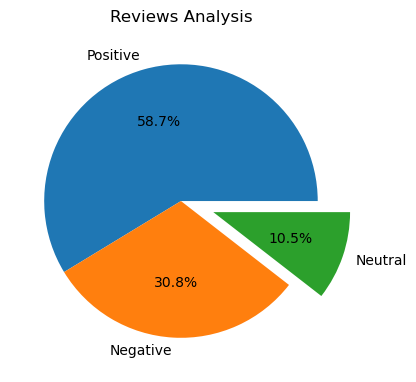

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [84]:
df.to_csv("cleaned-BA-reviews")

WORD CLOUD

In [85]:
!pip install wordcloud

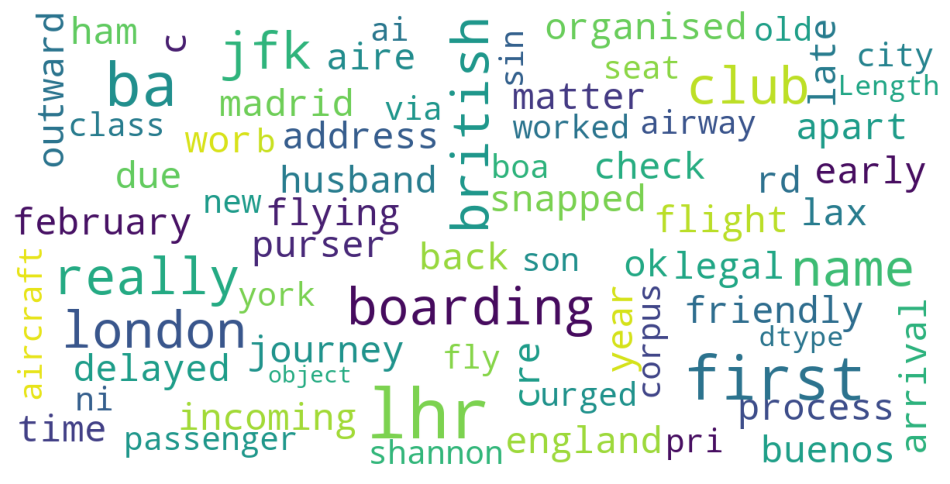

In [86]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.corpus)